<a href="https://colab.research.google.com/github/restiso7788/COVID-19-spread-trend/blob/master/LR_CellBox(09_14_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

In [2]:
from google.colab import files
uploaded = files.upload()

Saving expert.csv to expert.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['expert.csv']),index_col =0)
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,Caveolin,CyclinB1,CyclinD1,GSK3abpS21,GSKpS9,IGFBP2,p38pT180,p53,p70S6KpT389,SRCpY527,STAT3pY705,TSC2pT1462,YAPpS127,ACC1,AKTpT308,AKT,b-CateninpS,Fibronectin,HSP27,IGF1R-beta,IRS1,p27,c-Myc,SMAD3,STAT3,STAT5,STAT5pY694,COX2,PAX2,PLK1,...,ERa,GATA3,GSK3ab,mTORpS2448,p21,STAT6pY641,TAZpS89,XRCC1,PCNA,PDK1pS241,PI3Kp85,PKCa,RAD51,SRCpY416,4EBP1pT70,ACCpS79,Collagenase,CyclinE1,IRS1pS307,p38,SMAD3pS423,TSC2,SRC,G2M,G1arrest,G2arrest,Sarrest,cellviab,aMEK,aAKT,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,0.238,-0.338,-0.559,-0.614,-0.514,0.048,-0.298,0.277,-0.626,-0.306,0.131,-0.283,-0.089,0.056,0.044,-0.333,-0.006,-0.024,0.049,0.022,-0.045,0.315,-0.111,0.032,-0.024,0.116,-0.066,-0.367,0.297,-0.022,...,0.281,0.135,0.040,-0.159,-0.042,0.141,0.092,0.154,0.177,0.103,0.090,0.277,-0.121,-0.076,0.045,0.305,0.201,0.052,0.047,-0.004,0.132,0.024,0.182,0.0,0.563,0.000,0.0,0.242,-0.698,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,-0.420,-0.114,-0.564,-0.520,-0.438,0.391,-0.202,-0.172,-0.585,-0.154,0.000,-0.274,-0.058,-0.083,0.159,-0.273,-0.002,0.173,0.055,0.027,0.166,0.436,-0.312,-0.118,0.405,-0.173,0.001,0.743,0.195,-0.007,...,0.210,-0.042,0.104,-0.116,-0.038,0.090,0.088,0.041,0.056,0.300,0.053,0.147,-0.223,0.121,0.150,0.210,0.081,-0.051,-0.074,-0.015,0.239,-0.024,0.049,0.0,0.000,1.748,0.0,0.431,-0.698,0.0,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,0.084,-0.265,-0.569,-0.500,-0.505,0.092,-0.176,0.343,-0.653,-0.281,0.102,-0.265,0.123,0.100,0.087,-0.147,-0.025,0.002,0.091,0.134,0.017,0.445,-0.255,-0.023,-0.054,0.065,0.009,-0.854,0.173,-0.071,...,0.195,-0.010,0.090,-0.192,-0.091,0.118,0.046,0.028,0.025,0.124,0.066,0.218,-0.198,0.073,0.112,0.307,0.095,0.006,-0.059,0.023,0.109,0.021,0.230,0.0,0.464,0.000,0.0,0.143,-0.698,0.0,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,0.170,-0.390,-0.541,-0.740,-0.624,0.174,-0.151,0.237,-0.631,-0.289,-0.023,-0.342,-0.049,0.026,-0.080,-0.266,-0.049,0.065,0.081,0.149,0.028,0.410,-0.267,-0.066,-0.080,-0.004,-0.028,-0.509,0.198,-0.148,...,0.175,0.035,-0.013,-0.147,-0.063,0.120,0.063,0.021,0.188,0.098,-0.032,0.183,-0.176,0.115,0.017,0.186,0.120,-0.042,-0.228,-0.068,0.072,-0.024,0.221,0.0,0.532,0.000,0.0,-0.070,-0.698,0.0,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,0.205,-0.799,-0.829,-0.758,-0.660,0.187,-0.214,0.316,-0.825,-0.236,0.154,-0.337,0.021,0.020,0.010,-0.212,-0.027,0.096,0.154,0.200,-0.127,0.714,-0.409,-0.013,-0.064,0.005,0.020,-0.789,0.256,-0.299,...,0.238,0.016,0.052,-0.210,-0.093,0.116,0.109,0.114,0.120,0.128,0.032,0.236,-0.301,0.052,-0.083,0.174,0.189,0.025,-0.156,-0.048,0.286,0.037,0.282,0.0,0.701,0.000,0.0,0.286,-0.698,0.0,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
##doad LinearRegression 
clf = LinearRegression( )
#train_x, test_x, train_y, test_y = train_test_split(df.iloc[:, -13:],df.iloc[:,0], test_size=0.3) 
#train_tag = random.sample(list(range(0,len(df))), int(0.7*len(df)))
# test: random 30% of dfs ;train:70% of dfs
# get the train index 
train_tag = random.sample(list(range(0,len(df))), int(0.7*len(df))) 
X = df.iloc[:, -12:]
train_x = X[X.index.isin(train_tag)]
test_x = X[~X.index.isin(train_tag)]
# all test data
temp_data = df[~df.index.isin(train_tag)].iloc[:,0:87].reset_index(drop = True)

#loop linear_regression
def logist_regression(reponse):
    i = 0
    while i <= df.shape[1]-13:
       y = reponse.iloc[:,i]
       train_y = y[y.index.isin(train_tag)]
       test_y = y[~y.index.isin(train_tag)]   
       clf.fit(train_x.iloc[:,0:], train_y)
       clf_y = clf.predict(test_x.iloc[:,0:])
       new_reponse = 'pre_'+test_y.name
       temp_data[new_reponse] = clf_y
       i = i+1
    return temp_data

In [12]:
my_result = logist_regression(df)
my_result_x = my_result.iloc[:,0:87]
x_all = my_result_x.values.flatten()
my_result_y = my_result.iloc[:,-87:]
y_all = my_result_y.values.flatten()

In [6]:
my_result_x.shape

(27, 87)

In [7]:
my_result_y.shape

(27, 87)

In [13]:
x_prot = my_result_x.iloc[:,0:82]
y_prot = my_result_y.iloc[:,0:82]
x_pheno = my_result_x.iloc[:,82:87]
y_pheno = my_result_y.iloc[:,82:87]

In [9]:
my_result.shape

(27, 174)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Correlation between predictions and \n experiments across all conditions')

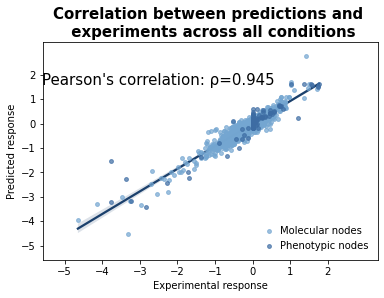

In [14]:
# Mimic figure 2C
# the columns from 0 to 82 represent for Molecular nodes
# columns 82 to 87 represent for phenotypic nodes
# pearson correlation is 0.948
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#74A6D1",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)

plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#1B406C', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))

lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*1.2])
plt.ylim([lower*1.2, upper*1.2])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental response')
plt.ylabel('Predicted response')
plt.title("Correlation between predictions and \n experiments across all conditions", 
          weight='bold', size=15)


# 14/09/2021 updates
1. update the loop to iterate through all columns
2. performace much worse
3. partition 1000 times 
4. build logistic model
5. try leave one drug out cross validation

## Questions
1. leave one drug, but other this specific one still have combionational effects with other drugs.
2. Same issue for "single-to-combo"
